In [1]:
import sys
#sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/research_Haukeli/Python/windrose')
sys.path.append('/Volumes/SANDISK128/Documents/Research_UiO_50/Python/windrose/')
from windrose import WindroseAxes
import netCDF4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python')
sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/')
import createFolder as cF
import math
%matplotlib inline

In [2]:
from matplotlib import colors

import matplotlib.cm as cm

In [3]:
viridis = plt.get_cmap('viridis')
champ = 255.
no1 = np.array([79,94,26])/champ
no2 = np.array([131,156,45])/champ
no3 = np.array([71,153,112])/champ
no4 = np.array([77,111,157])/champ
no5 = np.array([157,58,55])/champ
no6 = np.array([211,120,50])/champ
no7 = np.array([218,181,70])/champ

cmap = colors.ListedColormap([no1, no2, no3, no4, no5, no6, no7])

In [4]:
m = ['11', '12', '01', '02', '03']

In [5]:
savefig = 0
form = 'png'
figdir = '../../Figures/Weathermast'


In [6]:
for month in m:
    if month == '11':
        t = np.arange(8,31)
    if month == '12' or month == '01' or month == '03':
        t = np.arange(1,32)
    if month == '02':
        t = np.arange(1,29)
    if month == '11' or month == '12':
        year = '2016'
    if month == '01' or month == '02' or month == '03':
        year = '2017'
    
    for day in t:
        if day < 10:
            day = '0%s' %day
        else:
            day = '%s' %day
            
        dirnc = '../../Data/Eklima/Haukeliseter/precip_wind_temp_%s%s%s.nc' %(year,month,day)
        
        f = netCDF4.Dataset(dirnc, 'r')
        double_fence_acc = f.variables['RR_1'][:]
        
        count_nan = len(double_fence_acc) - pd.DataFrame(double_fence_acc).count()
        count_nan = np.array(count_nan)
        if count_nan <= 8:
            double_fence_24diff = np.nansum(double_fence_acc)
        else:
            double_fence_24diff = np.sum(double_fence_acc)
        
        
        
        print(year+'-'+month+'-'+day+':', double_fence_24diff)
        
        f.close()

/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater


2016-11-08: nan
2016-11-09: nan
2016-11-10: nan
2016-11-11: nan
2016-11-12: nan
2016-11-13: nan
2016-11-14: nan
2016-11-15: nan
2016-11-16: nan
2016-11-17: nan
2016-11-18: nan
2016-11-19: nan
2016-11-20: nan
2016-11-21: nan
2016-11-22: nan
2016-11-23: nan
2016-11-24: nan
2016-11-25: nan
2016-11-26: nan
2016-11-27: nan
2016-11-28: nan
2016-11-29: 3.5
2016-11-30: 5.7
2016-12-01: 5.4
2016-12-02: 0.0
2016-12-03: nan
2016-12-04: nan
2016-12-05: nan
2016-12-06: nan
2016-12-07: 11.6
2016-12-08: 10.1
2016-12-09: 10.1
2016-12-10: 6.9
2016-12-11: 1.3
2016-12-12: 0.8
2016-12-13: 0.9
2016-12-14: 0.0
2016-12-15: 0.6
2016-12-16: 0.2
2016-12-17: 1.2
2016-12-18: 0.1
2016-12-19: 0.2
2016-12-20: 0.1
2016-12-21: 17.1
2016-12-22: 25.6
2016-12-23: 23.3
2016-12-24: 24.8
2016-12-25: 15.4
2016-12-26: 25.1
2016-12-27: 5.1
2016-12-28: 1.1
2016-12-29: 1.5
2016-12-30: 27.8
2016-12-31: 23.6
2017-01-01: 0.3
2017-01-02: 0.8
2017-01-03: 9.8
2017-01-04: 1.7
2017-01-05: 0.0
2017-01-06: 3.4
2017-01-07: 0.8
2017-01-08: 1

In [7]:
double_fence_acc = []
double_fence_acc_mean = []
wind_dir_10m = []
wind_speed_10m = []
for month in m:
    if month == '11':
        t = np.arange(8,31)
    if month == '12' or month == '01' or month == '03':
        t = np.arange(1,32)
    if month == '02':
        t = np.arange(1,29)
    if month == '11' or month == '12':
        year = '2016'
    if month == '01' or month == '02' or month == '03':
        year = '2017'
    f = dict()
    
    tid = dict()
    for day in t:
        
        if day < 10:
            day = '0%s' %day
        else:
            day = '%s' %day
            
        dirnc = '../../Data/Eklima/Haukeliseter/precip_wind_temp_%s%s%s.nc' %(year,month,day)
        
        f[int(year+month+day)] = netCDF4.Dataset(dirnc, 'r')
        double_fence_acc.append(f[int(year+month+day)].variables['RR_1'][:])

        wind_dir_10m.append(f[int(year+month+day)].variables['DD'][:])
    #    tid[int(year+month+day)] = np.arange(wind_dir_10m.shape[0])

        wind_speed_10m.append(f[int(year+month+day)].variables['FF'][:])
        
        f[int(year+month+day)].close

/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater


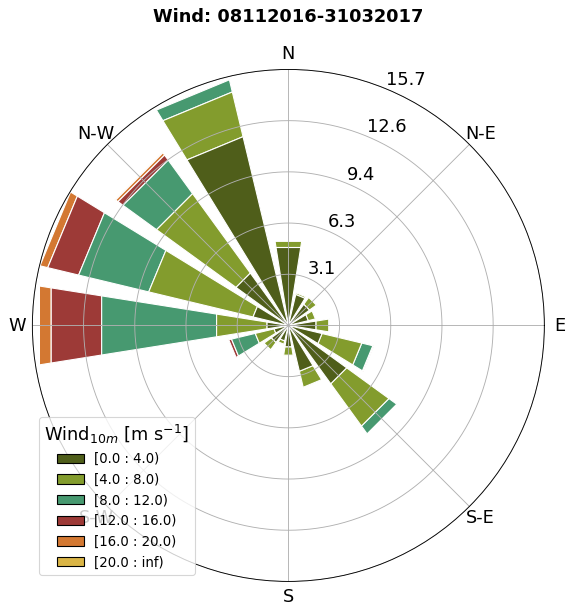

In [8]:
ax0 = WindroseAxes.from_ax()
ax0.bar(np.array(wind_dir_10m)[np.where(~ np.isnan(wind_dir_10m) )], 
       np.array(wind_speed_10m)[np.where(~ np.isnan(wind_dir_10m) )], 
       normed=True, opening=0.8, edgecolor ='white',cmap=cmap, bins = np.arange(0,24,4))
ax0._info['bins']
ax0.set_legend()
ax0.legend(title = 'Wind$_{10m}$ [m s$^{-1}$]', fontsize = 12)
ax0.get_legend().get_title().set_fontsize(16)
ax0.tick_params(labelsize = 16)
ax0.set_title('Wind: 08112016-31032017', fontsize = 16, y=1.08,fontweight='bold')
if savefig == 1:
    fig_name = 'Wind_distribution_2016_2017.png'
    cF.createFolder('%s/' %(figdir))
    plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight')
    print('plot saved: %s/%s' %(figdir,fig_name))

In [30]:
# attach the last 9 minutes from the previous day to calculate the rolling mean every 10 minutes
dofe_acc = []
wind_dir = []
wind_speed = []
for i in range(np.array(double_fence_acc).shape[0]-1):
    pp = (np.concatenate((np.array(double_fence_acc)[i,-9:],np.array(double_fence_acc)[i+1,:])))
    dofe_acc.append(pp)
    wd = (np.concatenate((np.array(wind_dir_10m)[i,-9:], np.array(wind_dir_10m)[i+1,:])))
    wind_dir.append(wd)
    ws = (np.concatenate((np.array(wind_speed_10m)[i,-9:], np.array(wind_speed_10m)[i+1,:])))
    wind_speed.append(ws)

In [35]:
# Calculate the moving average. That is, take
# the first ten values, average them, 
# then drop the first and add the eleventh, etc.
#dofe_acc = pd.DataFrame(np.array(dofe_acc)[:,9:])
dofe_acc_rolling = pd.DataFrame(dofe_acc).rolling(window=10,axis=1).mean()
dofe_acc_rolling = dofe_acc_rolling.values

#wind_dir = pd.DataFrame(np.array(wind_dir)[:,9:])
wind_dir_rolling = pd.DataFrame(wind_dir).rolling(window=10,axis=1).mean()
wind_dir_rolling = wind_dir_rolling.values

#wind_speed = pd.DataFrame(np.array(wind_speed)[:,9:])
wind_speed_rolling = pd.DataFrame(wind_speed).rolling(window=10,axis=1).mean()
wind_speed_rolling = wind_speed_rolling.values

/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 33 but corresponding boolean dimension is 24
  
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 33 but corresponding boolean dimension is 24
  This is separate from the ipykernel package so we can avoid 

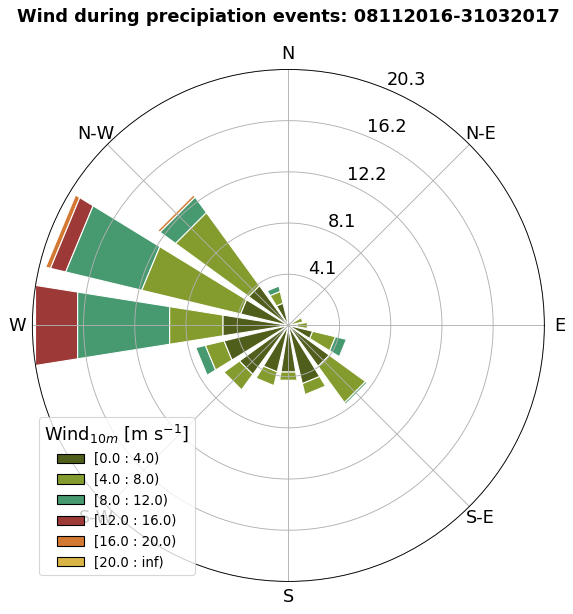

In [52]:
ax0 = WindroseAxes.from_ax()
ax0.bar(wind_dir_rolling[np.logical_and(~np.isnan(dofe_acc_rolling[:,9:]), dofe_acc_rolling[:,9:] >= 0.0)], 
        wind_speed_rolling[np.logical_and(~np.isnan(dofe_acc_rolling[:,9:]), dofe_acc_rolling[:,9:] >= 0.0)], 
       normed=True, opening=0.8, edgecolor ='white',cmap=cmap, bins = np.arange(0,24,4))
ax0._info['bins']
ax0.set_legend()
ax0.legend(title = 'Wind$_{10m}$ [m s$^{-1}$]', fontsize = 12)
ax0.get_legend().get_title().set_fontsize(16)
ax0.tick_params(labelsize = 16)
ax0.set_title('Wind during precipiation events: 08112016-31032017', fontsize = 16, y=1.08,fontweight='bold')
if savefig == 1:
    fig_name = 'Wind_precip_events_2016_2017'
    cF.createFolder('%s/' %(figdir))
    plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight')
    print('plot saved: %s/%s' %(figdir,fig_name))